In [1]:
from PIL import Image, ImageChops, ImageOps
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt
from skimage import io, color, feature, transform


In [18]:


def compute_difference_map(img_original, img_new):


    
    # img_original_gray = color.rgb2gray(img_original)
    # img_new_gray = color.rgb2gray(img_new)
    img_original_gray = np.sum(img_original,axis=-1)/3.
    img_new_gray = np.sum(img_new,axis=-1)/3.
    print(np.max(img_original_gray))
    # print(np.min(img_original_gray),np.max(img_new_gray))
    difference = np.abs(img_original_gray - img_new_gray)/255
         
    # diff_scaled = (difference - np.min(difference)) / (np.ptp(difference) + 1e-5)
    # diff_scaled =np.clip((difference * 255),0,255).astype(np.uint8)
    
    return img_original_gray, img_new_gray, difference




def visualize_images(img_original, img_new, diff_map,title):
    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300, layout='constrained')

    # Display the original image
    axs[0].imshow(img_original)
    axs[0].set_title(title)
    axs[0].axis('off')  # Hide axis

    # Display the new image
    axs[1].imshow(img_new)
    axs[1].set_title('Counterfactual')
    axs[1].axis('off')  # Hide axis

    # Display the difference map
    cmap_diff = LinearSegmentedColormap.from_list('', ['white','red'])

    axs[2].imshow(diff_map,cmap=cmap_diff)
    axs[2].set_title('Difference Map')
    axs[2].axis('off')  # Hide axis
    
    # Save the figure
    plt.savefig('comparison.png', dpi=300)
    plt.show()
    
    # fig_diff, ax_diff = plt.subplots(figsize=(5, 5), dpi=300)
    # ax_diff.imshow(diff_map, cmap=cmap_diff)
    # # ax_diff.set_title('Difference Map')
    # ax_diff.axis('off')
    # plt.savefig('difference_map.png', dpi=300, bbox_inches='tight')
    # # plt.show()


In [22]:
amd_image = Image.open("/home/ahmad/Pictures/SPIE/Label_0_original_image_count_0.png")
amd_normal_image = Image.open("/home/ahmad/Pictures/SPIE/Label_0_normal_count_0.png")
amd_image_array = np.array(amd_image)
amd_normal_array = np.array(amd_normal_image)

if amd_image is None:
    raise ValueError("Failed to load original image.")
if amd_normal_image is None:
    raise ValueError("Failed to load new image.")

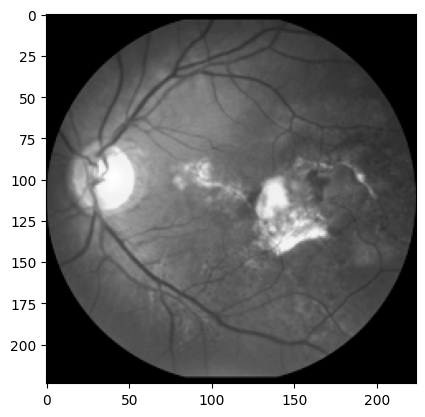

In [23]:
img_original_gray = color.rgb2gray(amd_image_array)
plt.imshow(img_original_gray,cmap='grey')

253.66666666666666


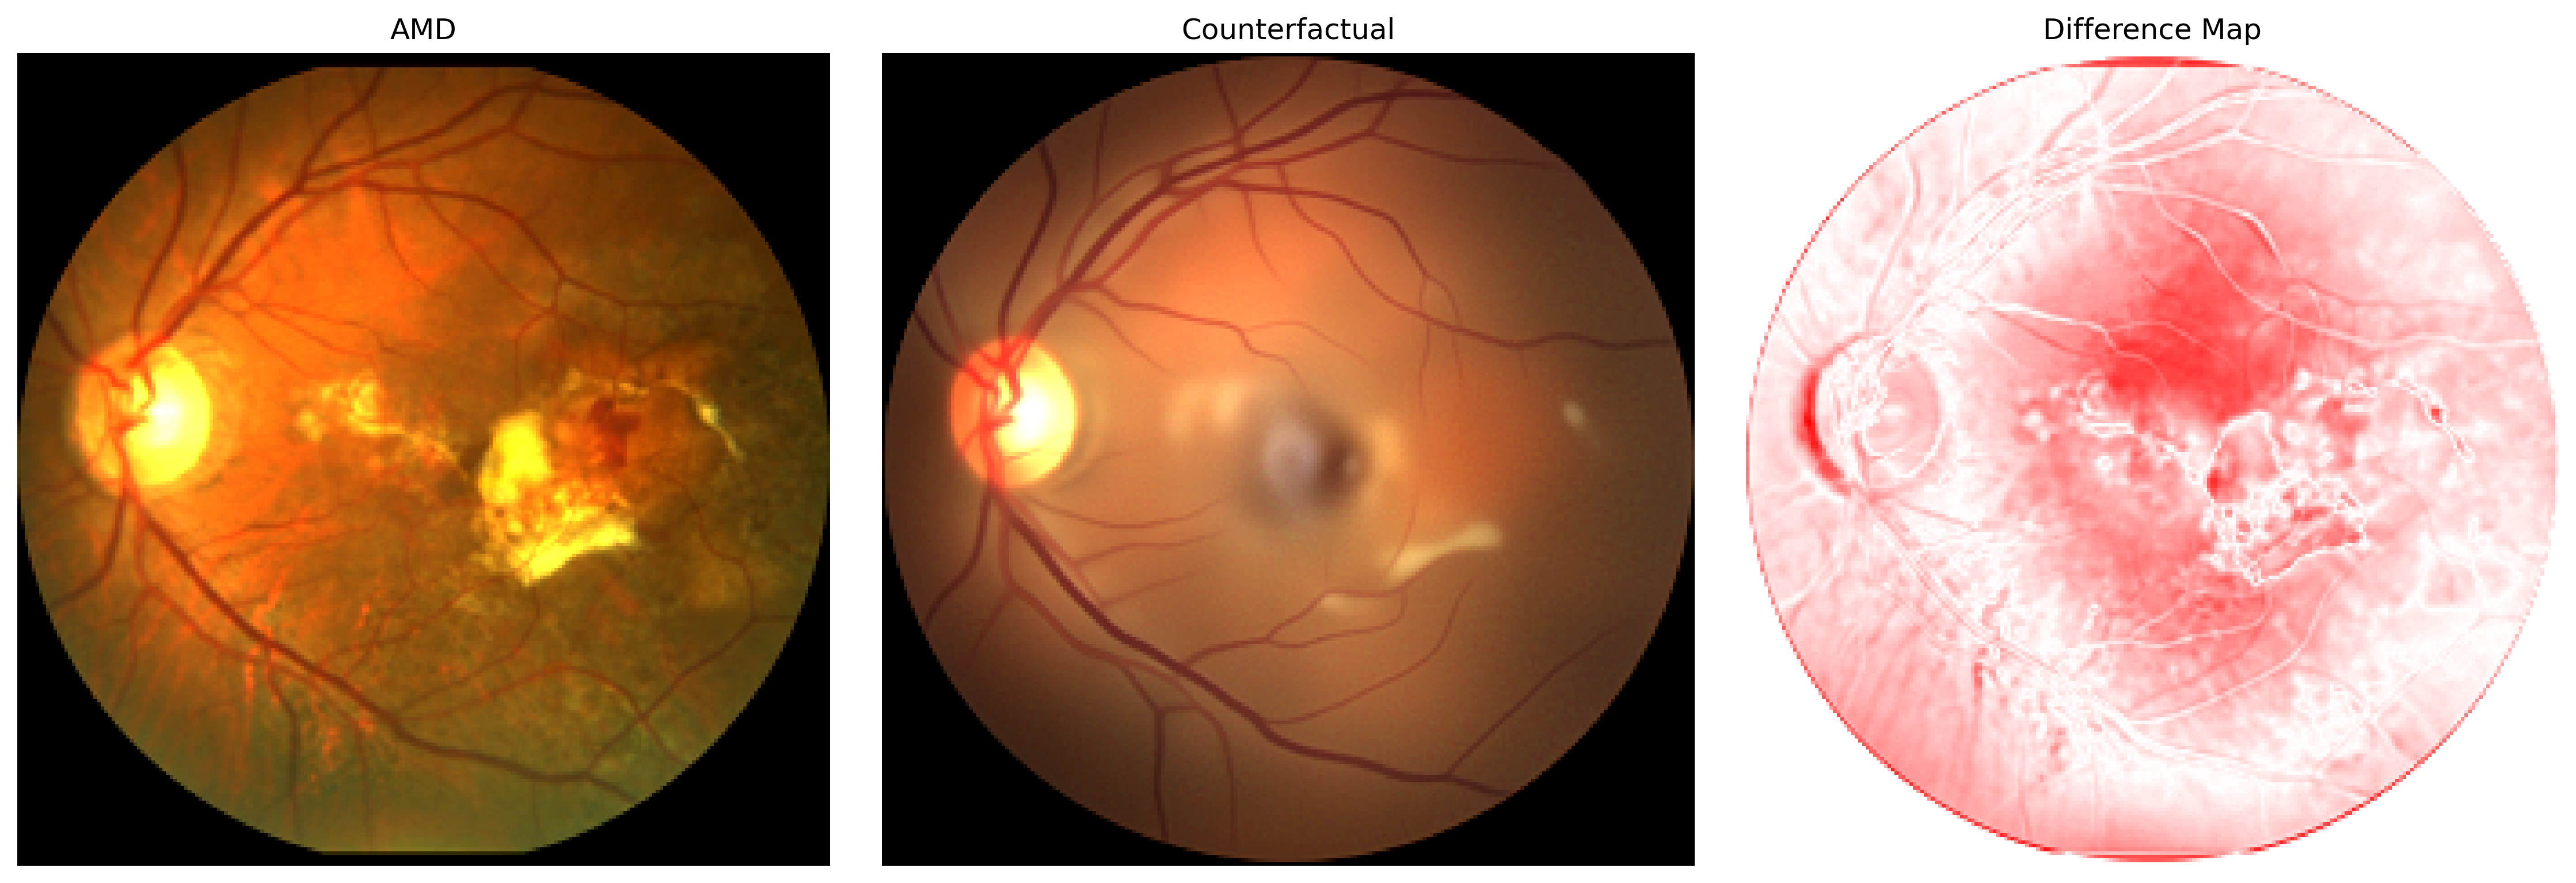

In [24]:
a_g,a_g_n,diff_map = compute_difference_map(amd_image_array, amd_normal_array)
visualize_images(amd_image_array, amd_normal_array, diff_map,'AMD')

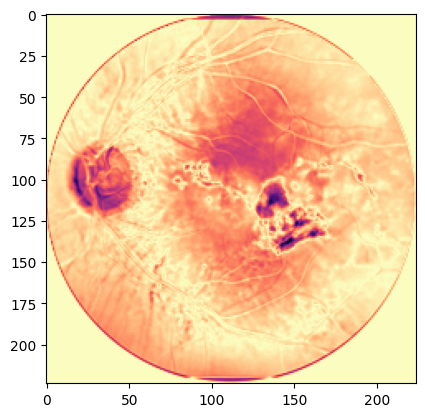

In [8]:
plt.imshow(diff_map,cmap='magma_r')

In [9]:
dr_image = Image.open("/home/ahmad/ahmad_experiments/retinal_cond_diff/counterfactuals_new/2/Label_2_original_image_count_20.png")
dr_normal_image = Image.open("/home/ahmad/ahmad_experiments/retinal_cond_diff/counterfactuals_new/2/Label_2_normal_count_20.png")

dr_array = np.array(dr_image)
dr_normal_array = np.array(dr_normal_image)



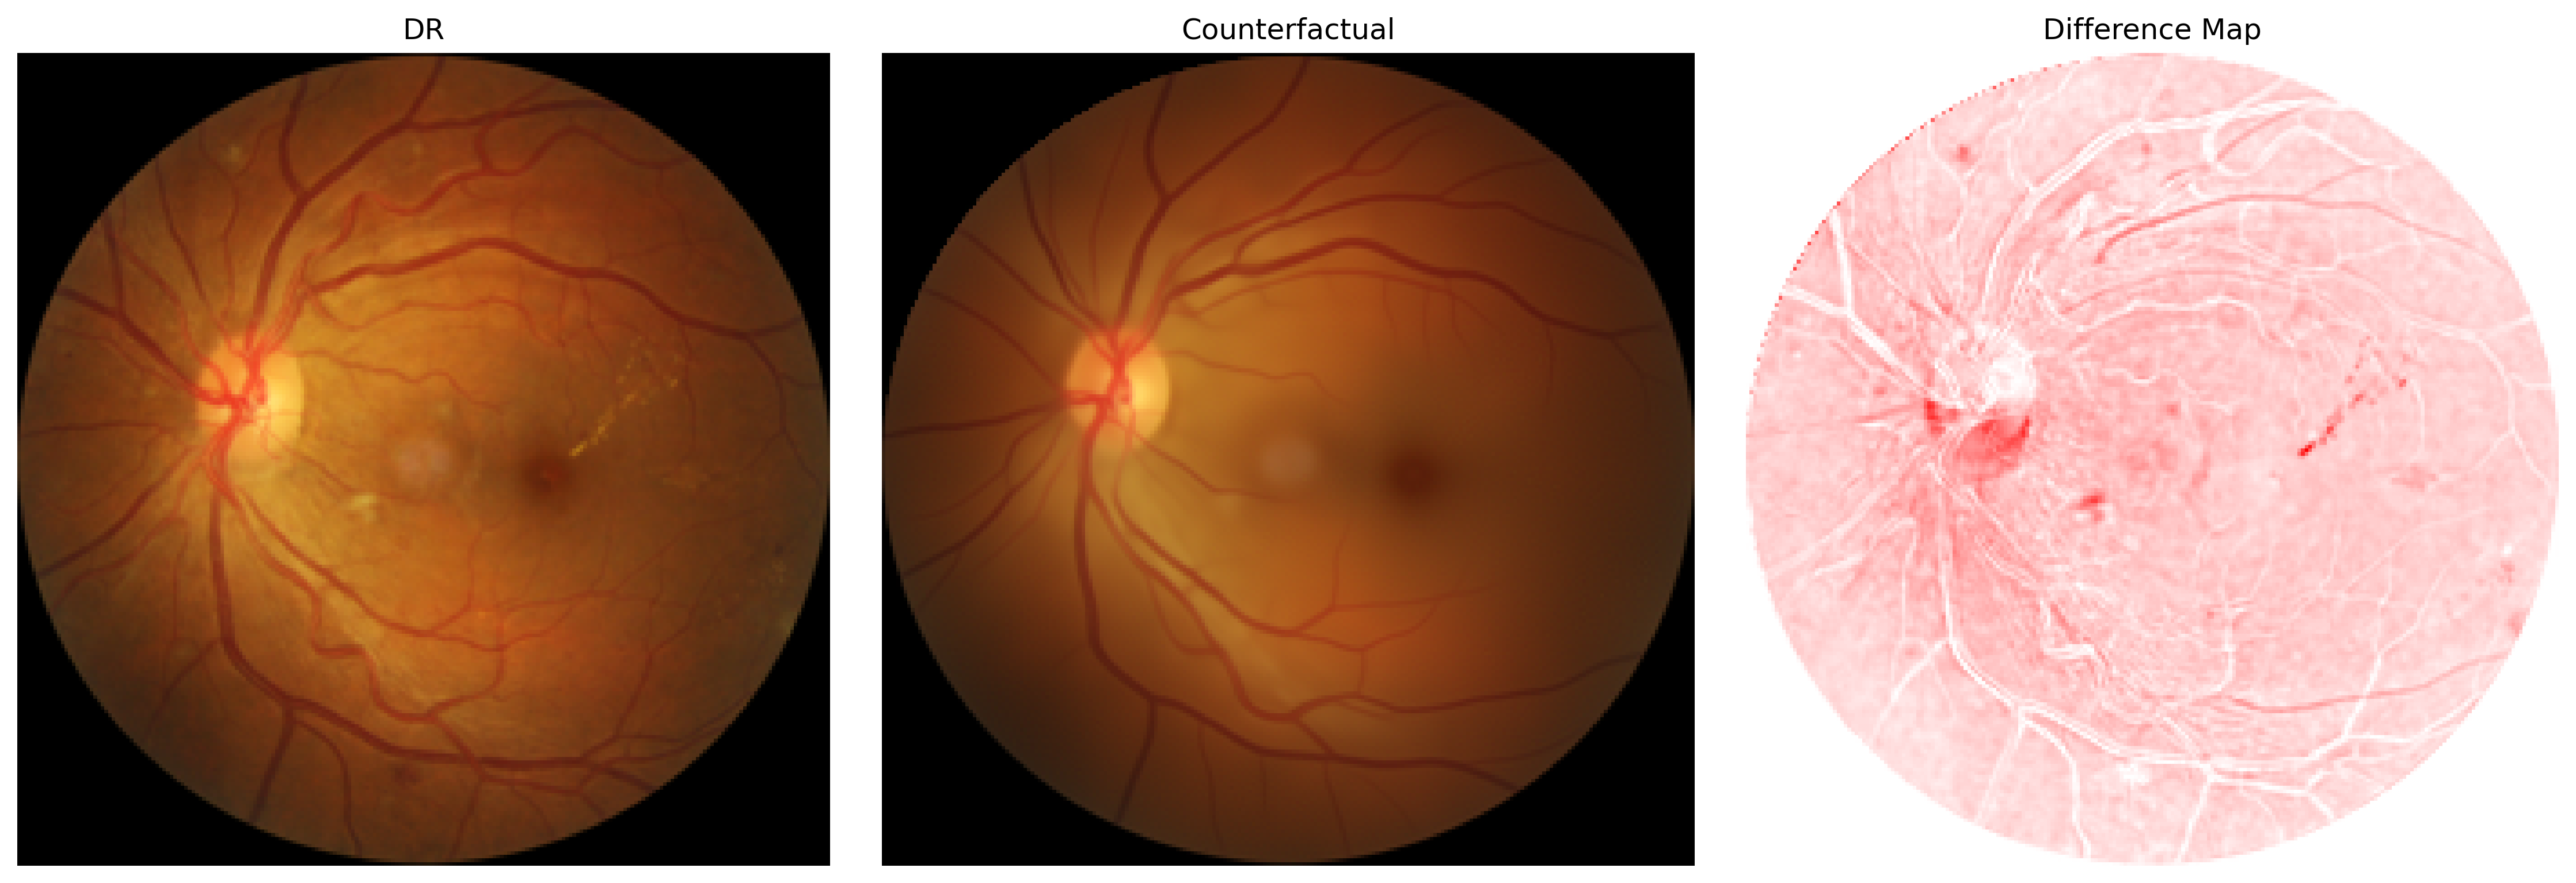

In [10]:
d_g,d_g_n,diff_map = compute_difference_map(dr_array, dr_normal_array)

visualize_images(dr_array, dr_normal_array, diff_map,'DR')

In [12]:
myopia_image = Image.open("/home/ahmad/ahmad_experiments/retinal_cond_diff/counterfactuals_new/4/Label_4_original_image_count_37.png")
myopia_normal_image = Image.open("/home/ahmad/ahmad_experiments/retinal_cond_diff/counterfactuals_new/4/Label_4_normal_count_37.png")

myopia_array = np.array(myopia_image)
myopia_normal_array = np.array(myopia_normal_image)



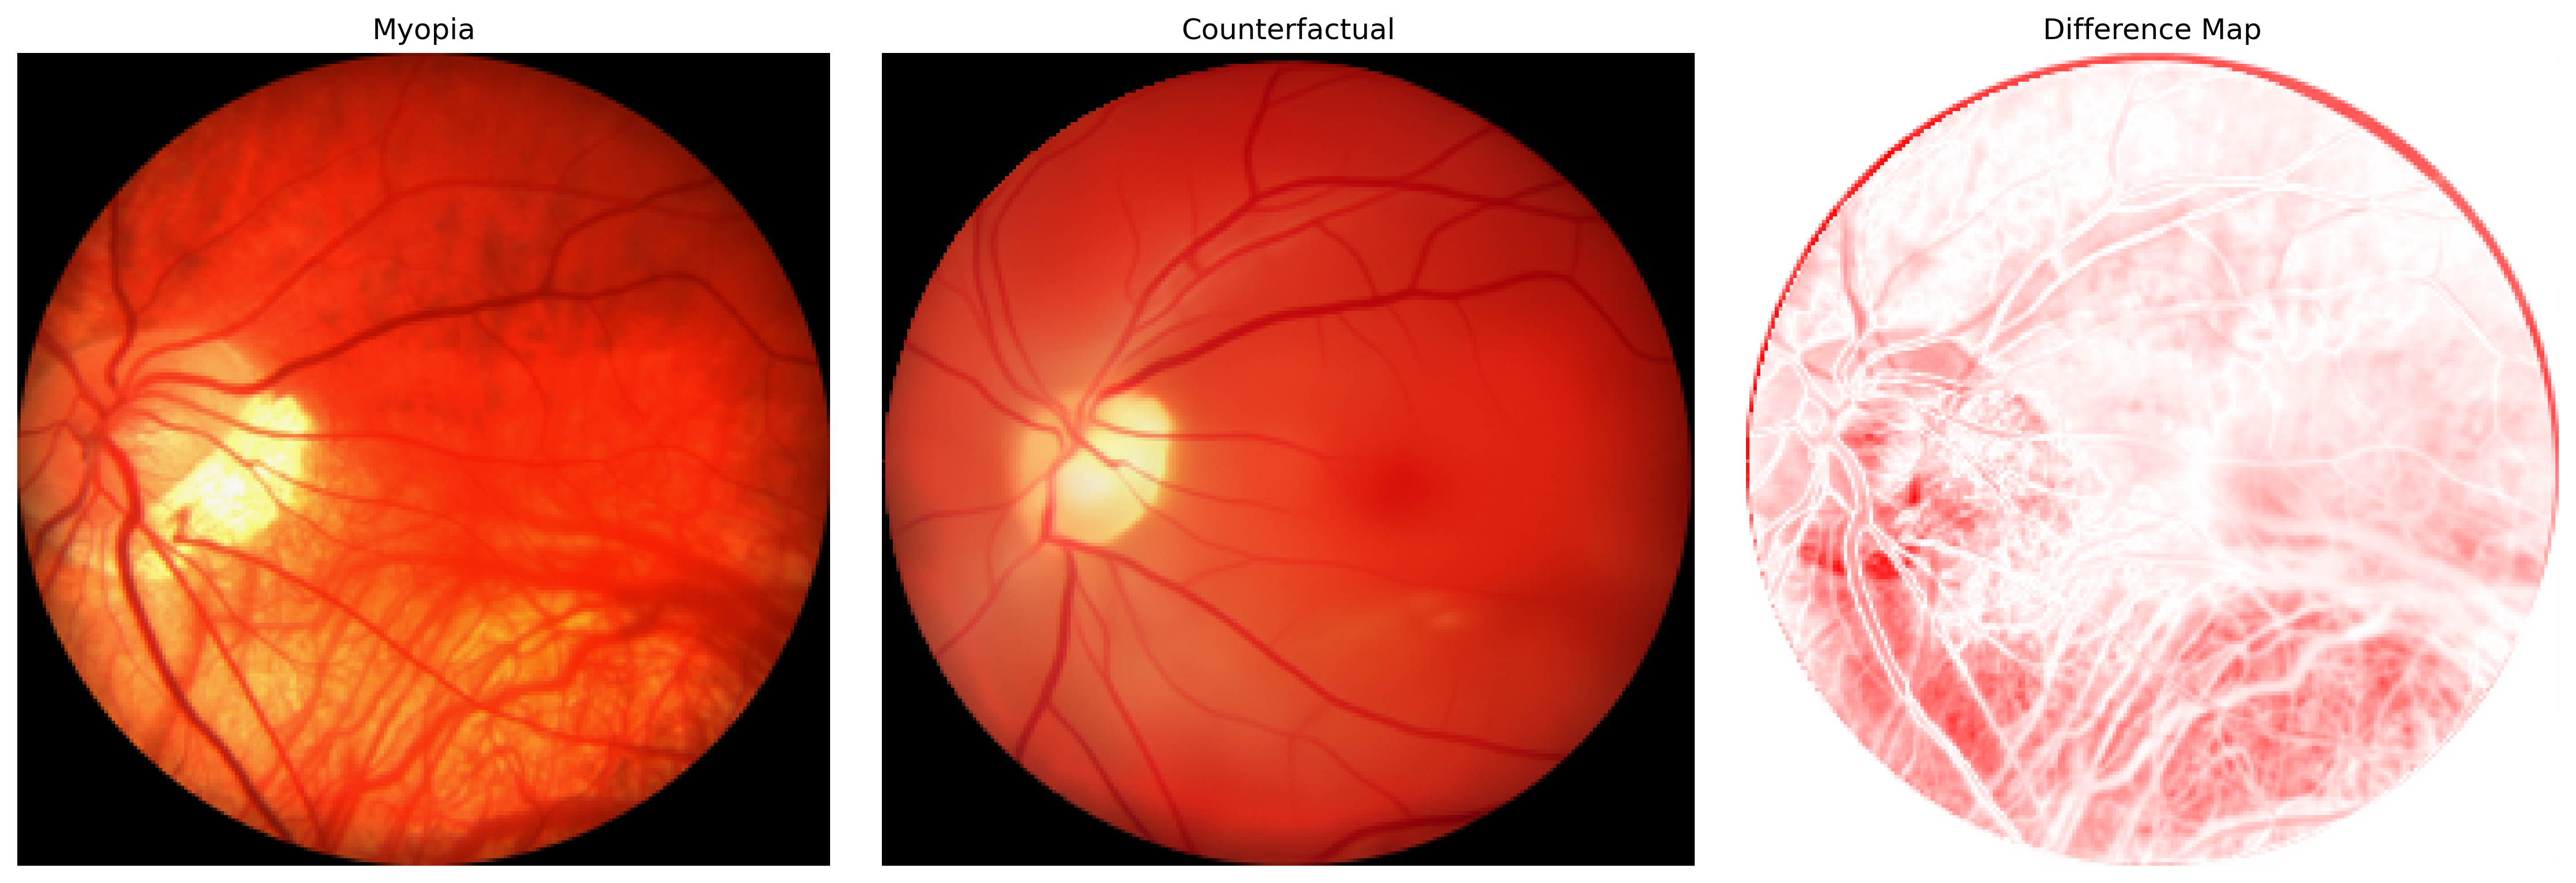

In [13]:
m_g,m_g_n,diff_map = compute_difference_map(myopia_array, myopia_normal_array)

visualize_images(myopia_array, myopia_normal_array, diff_map,'Myopia')